# Part 3: Gradient Descent in Code


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Implementing gradient descent in Python to optimize the parameters m (slope) and b (intercept) for a simple linear regression model.
### 1.Initialize Parameters:

In [3]:
# Initialize parameters
m = -1  # Initial slope
b = 1   # Initial intercept
alpha = 0.1  # Learning rate
points = np.array([[1, 3], [3, 6]])  # Given data points (x, y)
n = len(points)  # Number of data points

### 2.Define the Cost Function and Gradients:

In [4]:
# Function to compute gradients for m and b
def compute_gradients(m, b, points):
    x = points[:, 0]  # Extract x values from the data points
    y = points[:, 1]  # Extract y values from the data points
    y_pred = m * x + b  # Compute predicted y values using current m and b
    dm = (-2/n) * np.sum((y - y_pred) * x)  # Gradient for m
    db = (-2/n) * np.sum(y - y_pred)  # Gradient for b
    return dm, db

# Function to compute the cost (Mean Squared Error)
def compute_cost(m, b, points):
    x = points[:, 0]  # Extract x values
    y = points[:, 1]  # Extract y values
    y_pred = m * x + b  # Compute predicted y values
    cost = (1/n) * np.sum((y - y_pred) ** 2)  # Mean Squared Error
    return cost

### 3.Gradient Descent Implementation:

In [5]:
# Gradient Descent function with stopping condition
def gradient_descent(m, b, points, alpha, tolerance=1e-5, max_iterations=1000):
    m_history = []  # To store the history of m values
    b_history = []  # To store the history of b values
    cost_history = []  # To store the history of cost values
    previous_cost = float('inf')  # Initialize previous cost as infinity

    # Iterate for a maximum of max_iterations
    for iteration in range(max_iterations):
        # Compute gradients for m and b
        dm, db = compute_gradients(m, b, points)

        # Update m and b using gradient descent
        m = m - alpha * dm
        b = b - alpha * db

        # Compute the current cost (MSE)
        current_cost = compute_cost(m, b, points)

        # Append current values to history lists
        m_history.append(m)
        b_history.append(b)
        cost_history.append(current_cost)

        # Check for convergence: If the change in cost is below the tolerance, stop.
        # This means m and b are no longer changing significantly.

        if abs(previous_cost - current_cost) < tolerance:
            print(f"Converged after {iteration} iterations.")
            break

        # Update previous_cost for the next iteration
        previous_cost = current_cost

    # Return final values and history
    return m, b, m_history, b_history, cost_history

### 4.Run Gradient Descent:

In [6]:

# Set stopping condition parameters
tolerance = 1e-5  # Threshold for stopping condition (change in cost)
max_iterations = 100  # Maximum number of iterations to prevent infinite loops

# Run gradient descent
m_final, b_final, m_history, b_history, cost_history = gradient_descent(m, b, points, alpha, tolerance, max_iterations)

# Print final values of m and b
print(f"Final slope (m): {m_final}")
print(f"Final intercept (b): {b_final}")

Converged after 81 iterations.
Final slope (m): 1.4891914492674805
Final intercept (b): 1.5260941497680465


### 5.Visualize the Changes in `m and b`:

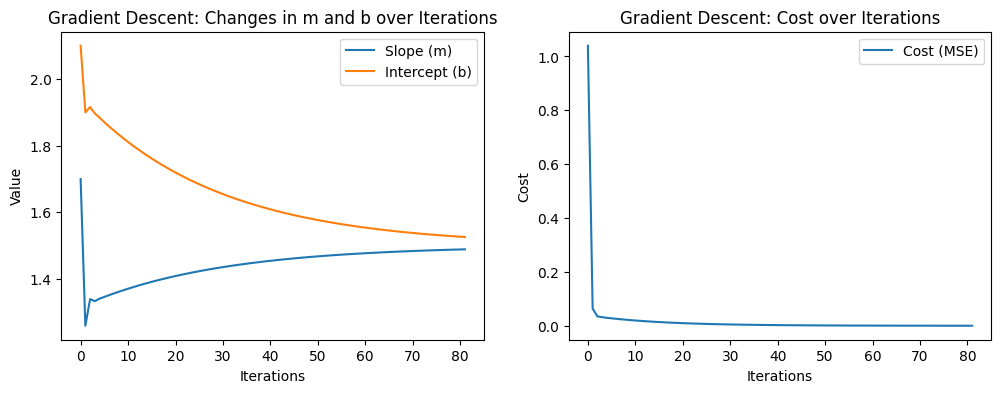

In [7]:
# Visualize the changes in m, b, and cost over iterations
plt.figure(figsize=(12, 4))

# Plot m and b over iterations
plt.subplot(1, 2, 1)
plt.plot(m_history, label='Slope (m)')
plt.plot(b_history, label='Intercept (b)')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Gradient Descent: Changes in m and b over Iterations')
plt.legend()

# Plot cost (MSE) over iterations
plt.subplot(1, 2, 2)
plt.plot(cost_history, label='Cost (MSE)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent: Cost over Iterations')
plt.legend()

plt.show()

### 6.Compute Final Predictions:

In [8]:
# Compute final predictions using the final values of m and b
x_values = points[:, 0]  # Extract x values from the data points
y_pred_final = m_final * x_values + b_final  # Compute final predictions
print("Final Predictions:", y_pred_final)

Final Predictions: [3.0152856 5.9936685]



### **Graph 1 (Left): Gradient Descent: Changes in m and b over Iterations**
This graph tracks how the **slope (\(m\))** and **intercept (\(b\))** evolve over iterations.

#### **Observations:**
1. **Initial sharp change:**  
   - The values of \(m\) (blue line) and \(b\) (orange line) change rapidly in the first few iterations.  
   - This happens because gradient descent takes large steps initially when the cost is high.
  
2. **Gradual stabilization:**  
   - As iterations increase, both \(m\) and \(b\) start flattening out, indicating that they are converging to optimal values.

3. **Final values approaching a solution:**  
   - The graph shows that \(m\) and \(b\) are no longer changing significantly, meaning gradient descent has found a near-optimal solution.

🔹 **Key takeaway:**  
The algorithm is learning the best fit for \(m\) and \(b\) by minimizing the cost function.



### **Graph 2 (Right): "Gradient Descent: Cost over Iterations"**
This graph shows how the **cost function (Mean Squared Error, MSE)** decreases over time.

#### **Observations:**
1. **High initial cost:**  
   - At the start, the cost is high because the initial values of \(m\) and \(b\) are far from optimal.

2. **Rapid decrease in cost:**  
   - The cost drops sharply in the first few iterations as gradient descent makes large updates.

3. **Convergence (flattening curve):**  
   - After several iterations, the cost stabilizes and no longer decreases significantly.
   - This means the algorithm has found a near-optimal solution.

🔹 **Key takeaway:**  
The cost function is decreasing as the model learns, proving that gradient descent is successfully optimizing the parameters.



### **Overall Interpretation**
- The left graph shows how the **parameters (\(m\) and \(b\))** are adjusting.
- The right graph shows how the **error is decreasing**, proving that the model is learning.
- Together, they confirm that gradient descent is working correctly and finding the best fit.
  Result:
```
Final Predictions: [3.0152856  5.9936685]
```
- When \( x = 1 \), \( y \approx 3.015 \) (close to the actual \( y = 3 \))
- When \( x = 3 \), \( y \approx 5.994 \) (close to the actual \( y = 6 \))